In [13]:
import logging

from ArxivEquationScraping import *
from EquationFiltering import *
from PictureGenerator import *

#### - Scraping ArXiv for STEM-category papers:

In [4]:
nr_papers = 10
STEM_category = 'physics'
download_directory = "arxiv_papers/"
download_arxiv_papers(STEM_category, nr_papers, download_dir=download_directory)

======= Downloading: 10 (out of 1561) papers in category: 'physics' in YY/MM: 2303 =======


#### - Extracting .tex files from papers and deleting other files:

In [5]:
unpack_tex_files(download_directory=download_directory)

 ===== Handling file nr: 1 with id: .DS_Store =====
 ===== Handling file nr: 2 with id: 2303.00072 =====
 File nr: 2 with id: 2303.00072 - contains '.tex' file: 
Extracting main.tex as main.tex
 ===== Handling file nr: 3 with id: 2303.00081 =====
 File nr: 3 with id: 2303.00081 - contains '.tex' file: 
Extracting main.tex as main_1.tex
 ===== Handling file nr: 4 with id: 2303.00059 =====
 File nr: 4 with id: 2303.00059 - contains '.tex' file: 
Extracting PoP_LRRC.tex as PoP_LRRC.tex
 ===== Handling file nr: 5 with id: 2303.00061 =====
 Deleting file nr: 5 with id: 2303.00061 - no '.tex' file found...
 ===== Handling file nr: 6 with id: 2303.00033 =====
 File nr: 6 with id: 2303.00033 - contains '.tex' file: 
Extracting main.tex as main_2.tex
 ===== Handling file nr: 7 with id: 2303.00114 =====
 Deleting file nr: 7 with id: 2303.00114 - no '.tex' file found...
 ===== Handling file nr: 8 with id: 2303.00104 =====
 Deleting file nr: 8 with id: 2303.00104 - no '.tex' file found...
 ===== H

#### - Scraping .tex files for equations:

In [6]:
download_directory = "arxiv_papers/"
file_names = [download_directory+file_name for file_name in os.listdir(download_directory) if file_name != ".DS_Store"]
output_file_name = "scraped_equations.txt"
equations = math_scraper(input_names=file_names,output_name=output_file_name)

100%|██████████| 7/7 [00:00<00:00, 3965.98it/s]

==== Scraped: 37 equations, and saved to: scraped_equations.txt ====


#### - Filtering equations:


In [8]:

valid_equations = []
for i in tqdm(range(len(equations))):
    equation = equations[i]
    equation_start_token = r'\begin{equation}'
    equation_end_token = r'\end{equation}'
    if is_valid_latex_math(expr=equation_start_token+equation+equation_end_token):
        valid_equations.append(equation)
print(f"==== {len(valid_equations)} out of {len(equations)} are valid equations ====")


100%|██████████| 36/36 [00:08<00:00,  4.30it/s]

==== 33 out of 36 are valid equations ====


##### Show one of the extracted equations:

In [9]:
print(valid_equations[5])

\begin{aligned}\partial_{t}\omega+u\cdot\nabla\omega &  =0\\u\left(  t,x\right)   &  =\int K\left(  x,y\right)  \omega\left(  t,y\right)dy\\\omega|_{t=0} &  =\omega_{0}\end{aligned}


In [10]:
print(to_inline_expr(valid_equations[5]))

$\begin{aligned}\partial_{t}\omega+u\cdot\nabla\omega &  =0\\u\left(  t,x\right)   &  =\int K\left(  x,y\right)  \omega\left(  t,y\right)dy\\\omega|_{t=0} &  =\omega_{0}\end{aligned}$


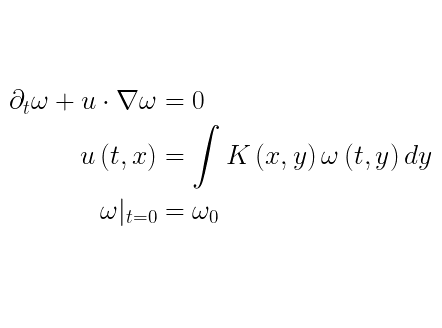

In [11]:
render_and_show(valid_equations[5])

#### - Rendering equations to A4 sized transparent .png files and saving locally:


In [26]:
%xmode Plain
import logging
import contextlib


saved = 0
for line_nr in tqdm(range(len(valid_equations))):
    location = 'EquationRenders/'
    try:
        filename = f'eq_line_{line_nr}'
        latex_to_image(math_expr=valid_equations[line_nr], file_name=filename, location=location)
        saved += 1
    except Exception as e:
        # log the error message to a file
        pass


Exception reporting mode: Plain


100%|██████████| 33/33 [00:07<00:00,  4.14it/s]

Error in callback <function _draw_all_if_interactive at 0x1599168c0> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\begin{split}    &\\\\sigma^+: \\\\frac{\\\\widehat{x}\\\\cos\\\\theta+ \\\\mathrm{i}\\\\widehat{y}}{{\\\\sqrt{2}}}. \\\\\\\\    &\\\\sigma^-: \\\\frac{\\\\widehat{x}\\\\cos\\\\theta- \\\\mathrm{i}\\\\widehat{y}}{{\\\\sqrt{2}}}.\\\\\\\\    &\\\\pi: \\\\hspace{0.2cm} \\\\widehat{x}\\\\sin\\\\theta.\\\\end{split}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../f7d2d54d7fcc0e42a4e4bb69cfdcbd33.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../f7d2d54d7fcc0e42a4e4bb69cfdcbd33.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file f7d2d54d7fcc0e42a4e4bb69cfdcbd33.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...e{0.2cm} \widehat{x}\sin\theta.\end{split}
                                                  $}%
No pages of output.
Transcript written on f7d2d54d7fcc0e42a4e4bb69cfdcbd33.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\begin{split}    &\\\\sigma^+: \\\\frac{\\\\widehat{x}\\\\cos\\\\theta+ \\\\mathrm{i}\\\\widehat{y}}{{\\\\sqrt{2}}}. \\\\\\\\    &\\\\sigma^-: \\\\frac{\\\\widehat{x}\\\\cos\\\\theta- \\\\mathrm{i}\\\\widehat{y}}{{\\\\sqrt{2}}}.\\\\\\\\    &\\\\pi: \\\\hspace{0.2cm} \\\\widehat{x}\\\\sin\\\\theta.\\\\end{split}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../f7d2d54d7fcc0e42a4e4bb69cfdcbd33.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../f7d2d54d7fcc0e42a4e4bb69cfdcbd33.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file f7d2d54d7fcc0e42a4e4bb69cfdcbd33.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...e{0.2cm} \widehat{x}\sin\theta.\end{split}
                                                  $}%
No pages of output.
Transcript written on f7d2d54d7fcc0e42a4e4bb69cfdcbd33.log.




<Figure size 830x1170 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'$\\\\begin{split} \\\\widehat{x} \\\\rightarrow \\\\widehat{x}\\\\cos\\\\theta-\\\\widehat{z}\\\\sin\\\\theta, \\\\\\\\ \\\\widehat{z} \\\\rightarrow \\\\widehat{z}\\\\cos\\\\theta+\\\\widehat{x}\\\\sin\\\\theta.\\\\end{split}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../72b9a4efe4a7d9dda1468c3cab76bf4a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../72b9a4efe4a7d9dda1468c3cab76bf4a.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file 72b9a4efe4a7d9dda1468c3cab76bf4a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...os\theta+\widehat{x}\sin\theta.\end{split}
                                                  $}%
No pages of output.
Transcript written on 72b9a4efe4a7d9dda1468c3cab76bf4a.log.




<Figure size 830x1170 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b"$\\\\begin{split}   \\\\mathcal{M}_{\\\\rm{O}}= \\\\sqrt{\\\\frac{4\\\\pi}{3}}\\\\langle l'm_l'|&\\\\frac{\\\\widehat{x}\\\\cos\\\\theta+ \\\\mathrm{i}\\\\widehat{y}}{\\\\sqrt{2}}Y_{1, 1}+\\\\frac{\\\\widehat{x}\\\\cos\\\\theta- \\\\mathrm{i}\\\\widehat{y}}{\\\\sqrt{2}}Y_{1,- 1}\\\\\\\\&+\\\\widehat{x}\\\\sin\\\\theta Y_{1,0}|lm_l\\\\rangle.   \\\\end{split}$"

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../f9eff92dfb428b32450770dc7873e351.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../f9eff92dfb428b32450770dc7873e351.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file f9eff92dfb428b32450770dc7873e351.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...n\theta Y_{1,0}|lm_l\rangle.   \end{split}
                                                  $}%
No pages of output.
Transcript written on f9eff92dfb428b32450770dc7873e351.log.




<Figure size 830x1170 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'$ \\\\begin{split}\\\\mathbf{ E_{\\\\rm{out}}} &= \\\\begin{bmatrix}  1 & 0 \\\\\\\\ 0 & 1  \\\\end{bmatrix}\\\\cdot \\\\begin{bmatrix} {{f(n_a)}} & 0 \\\\\\\\ 0 & {f(n_b)} \\\\end{bmatrix}\\\\cdot \\\\overbrace{\\\\begin{bmatrix} 1 & 0 \\\\\\\\ 0 & 1 \\\\end{bmatrix}}^{\\\\longleftrightarrow, \\\\hspace{0.1cm}  \\\\updownarrow} \\\\cdot\\\\overbrace{\\\\begin{bmatrix} 1\\\\\\\\ 0 \\\\end{bmatrix}}^{\\\\longleftrightarrow} \\\\\\\\ &= \\\\begin{bmatrix} f(n_a) & 0) \\\\\\\\ 0 & f(n_b) \\\\end{bmatrix} \\\\cdot \\\\begin{bmatrix} 1 \\\\\\\\ 0 \\\\end{bmatrix} \\\\\\\\&= \\\\begin{bmatrix} f(n_a) \\\\\\\\ 0 \\\\end{bmatrix} \\\\\\\\&= f(n_a) \\\\cdot \\\\begin{bmatrix} 1 \\\\\\\\ 0 \\\\end{bmatrix}\\\\end{split}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../8b2107af34c4ac060ddb0c8cafda5b59.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../8b2107af34c4ac060ddb0c8cafda5b59.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file 8b2107af34c4ac060ddb0c8cafda5b59.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...n{bmatrix} 1 \\ 0 \end{bmatrix}\end{split}
                                                  $}%
No pages of output.
Transcript written on 8b2107af34c4ac060ddb0c8cafda5b59.log.




<Figure size 830x1170 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'$\\\\begin{split}\\\\mathbf{E_{\\\\rm{out}}} &= \\\\begin{bmatrix} {{f(n_a)}} & 0\\\\\\\\ {f(n_b)}-{f(n_a)} & {f(n_b)} \\\\end{bmatrix} \\\\cdot \\\\overbrace{\\\\begin{bmatrix} 0 \\\\\\\\ 1 \\\\end{bmatrix}}^{\\\\updownarrow}\\\\\\\\&=\\\\begin{bmatrix} {0}\\\\\\\\ {f(n_b)} \\\\end{bmatrix}  \\\\\\\\&= {f(n_b)} \\\\cdot \\\\begin{bmatrix} 0\\\\\\\\ 1 \\\\end{bmatrix}\\\\end{split}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../0a18a857ef455a97f6d22f7d57a913ff.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../0a18a857ef455a97f6d22f7d57a913ff.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file 0a18a857ef455a97f6d22f7d57a913ff.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...in{bmatrix} 0\\ 1 \end{bmatrix}\end{split}
                                                  $}%
No pages of output.
Transcript written on 0a18a857ef455a97f6d22f7d57a913ff.log.




<Figure size 830x1170 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'$ \\\\begin{split} \\\\mathbf{R} =\\\\begin{bmatrix} a_1 & b_1 \\\\\\\\ a_2 & b_2 \\\\end{bmatrix}^\\\\dagger = \\\\mathcal{F} \\\\cdot \\\\begin{bmatrix} \\\\cos\\\\beta & -\\\\sin\\\\beta \\\\\\\\ \\\\sin\\\\beta & \\\\cos\\\\beta \\\\end{bmatrix} \\\\\\\\\\\\implies \\\\lvert a_1\\\\cdot b_1 \\\\rvert = \\\\lvert a_2\\\\cdot b_2 \\\\rvert.\\\\end{split} $'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../003c602110d85b4ea6fa5e65ad1770d2.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../003c602110d85b4ea6fa5e65ad1770d2.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
math.sty
For additional information on amsmath, use the `?' option.

(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
text.sty
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
gen.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
bsy.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/amsmath/ams
opn.sty))
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20220321_3/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file 003c602110d85b4ea6fa5e65ad1770d2.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <20> not available
(Font)              size <20.74> substituted on input line 29.


LaTeX Font Warning: Font shape `OMX/cmex/m/n' in size <13.99994> not available
(Font)              size <14.4> substituted on input line 29.


! Package amsmath Error: \begin{split} won't work here.

See the amsmath package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...t = \lvert a_2\cdot b_2 \rvert.\end{split}
                                                   $}%
No pages of output.
Transcript written on 003c602110d85b4ea6fa5e65ad1770d2.log.




<Figure size 830x1170 with 1 Axes>